# Disclaimer

<i>This is by no means a tutorial on machine learning , its rather for those who already have their hands on on implementing neural network models using Frameworks like TensorFlow , Caffe , Keras etc.. but wanting to explore what's happening under the hood. </i>

# Cycle of Artificial Learning

In a supervised learning, training a machine learning model follows a chronological sequence of steps , from feeding a set of labeled instances , calculate a loss function , reduce the loss through an iterative process untill convergence. Neural network is no exception, however associated acronyms are adopted to define each step :
<ul> 
    <li>Feed Forward</li>
    <li>Loss Function</li>
    <li>Backpropogation</li>
    <li>Convergence</li>
</ul>


# Logistic Regression

Let's refresh on the computational graph of a logistic regression. for simplicity, we assume 2 features x1 and x2 along with their respective weights and a bias :


\begin{align}
z= w1x1 + w2x2 + b \qquad  a = \hat{y}=\sigma(z) \qquad where \ \sigma(z) = \frac{1}{1+e^{-z}} = (1 + e^{-z})^{-1} 
\end{align}

In the above computational graph, random weights w1 and w2 are assigned to x1 and x2 respectively. In a binary classification we shall expect an output between 0 or 1. to guarantee such output, Sigmoid function is applied and the result is a predicted output ($\hat{y}$) which , most likely deviate from the actual output (y). This deviation is the error (aka loss function) that needs to be corrected. Gradient descent is then performed to reduce this error by tuning the parameters w1 , w2 and b . 

# What's a cost function?

Let's assume for example you want to predict the value of your old laptop. for simplicity, we assume that the only factor that affects the value of your laptop is its CPU clock speed. You manage to collect information on already sold laptops on ebay where you know their CPU clock speed (x) and the value they were sold at (y).
Mathematically , this is a linear function as : Value = ratio * speed , or more formally h(x)=y= $\theta$.x <br>
To train a model that can predict the value of my laptop, we have taken all this instances, randomy assiging a ratio($\theta$) and we calculated an predicted output $\hat{y}$ for each example. with this random initialization, we are going to end up with a difference between the predicted value and the real value. this difference is the error, and the cost function is the average sum of all errors happened at each example defined as :
\begin{align}
\ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(\hat{y} - y)^2
\end{align}
###  <i> Why not using the Average Sum of Squares for Logistic Regression ? :</i>
if we were to plot a graph of this cost against the predicted value for Linear regression, we are going to end up in a convex shape [picture A], and that is good enough for an error decreasing mechanism, we talk about later. That's not the case with Logistic Regression, where the predicted output is passed to a more complex function ( the sigmoid ) which, if using the Sum of Squared Error cost function, we will end up in a non-convex shape [picture B] . What this is even important ? that's because our goal is go down those hills to find the lowest point. in the case of non-linearity, there is no guarantee we will reach the lowest point as we have many of those ( called local optima ). for this reason , a better way to write a cost function for Logistic Regression that give us a convex shape where we the goal is to reach the lowed point is not confusion ( global minimum )  : 
\begin{align}
\mathscr{L}(\hat{y},y)=-ylog(\hat{y})-(1-y)log(1-\hat{y})
\end{align}

i have talked about a mechanism that mathemitically can help us decrease the cost . This mechanism is called Gradient descent. Before diving into it, let's refresh on some calculus.

<img src="images/non-convex-convex.jpg" width="700" /> 

## Calculus Is Easier Without its Naming Convention Terms :

The initial terror, which choked off most of us at school, are those acronyms used in calculus such 
as "an element of" (dx), integral $\int$dx. it turns out that "an element of" (dx) is simply "a litte bit" of x , a really tiny bit , and the $\int$dx is the sum of those little bits. as simple as this ! <br>
More concretely, let's say we have two correlated variable x and y , and we need to measure how much y will change when we nudge x a tiny bit ( dx ). Assume y = 2x , by nudging x with a very tiny value ( dx = 0.001 ) we have an alteration of y by (dy)  : <br>
\begin{align}
\ y + dy = 2(x + dx)
\end{align}
if x= 3 , then : 
\begin{align}
\ y = 2(3) = 6 \\
\ y=2(3+0.001) = 6.002 \\ dy = 0.002
\end{align}
Thus , we can say , with every nudge of x (dx) , y is changing twice as much as (dx). we've done all this as we are after the value of such ratio 0.002/0.001  = 2
\begin{align}
\ \frac{dy}{dx} = 2 
\end{align}
and that is the partial derivative !

In the above example we have seen a positive correlation but that's no always the case. let's take another example where an increase in x causes a decrease in y, and we will go a bit deeper to see, geometrically, how this change is calculated.
in the below picture,a ladder laid on a wall , assuming that AB is a fixed length. let x be the horizontal distance from a wall of the bottom end of the ladder and y the height it reaches up the wall. 
if pull its lower end by a value (dx) by 1 cm , the height of the ladder will obviously decrease by (dy). but by how much ? 
if we calculate the y by euclid , we shall be able to figure out the value of dy . the length of the ladder : 
\begin{align}
\ \sqrt{(180)^2+(19)^2} = 181 cm
\end{align}
and then the new height would be : 
\begin{align}
\ (y - dy)^2 = (181)^2 - (20)^2 = 32361 \\
\ y - dy = \sqrt{32361} = 179.89
\end{align}
now y is 180 , so dy is 180 - 179.89 = 0.11 cm . so we see by making an increase of 1 cm ( dx = 1 ) has resulted in a decrease of dy by 0.11 cm , thus : 
\begin{align}
\ \frac{dy}{dx}= -\frac{0.11}{1}
\end{align}



<img src="images/ladder-calc.jpg" width="400" /> 

I hope this explanation makes the part of calculus we need is easier. and that's exactly the core concept of how gradient descent works, which we will explore next . 

## Gradient Descent :

We have talked in the Loss function section, that there is mechanism that helps us decrease our errors to the maximum possible. if we have to plot the cost function against one variable, we end up in a convex shape as in the below graph. let's talk about possible scenarios W can take, one at point "P" and point another at point "N". 
Calculus tells us, that the derivative of a function is the slope of that function. at point P the derivative (slope) is positive we need decrease W, hoping we reach the least error possible "G". on the other hand if the derivative (slope) is negative as at point "N" , then we need to decrease the value of W, again hoping to reach the global minimum as "G". However, we need to choose a rate of such increase or decrease. and this is conventially a hyperparameter called alpha.
Technically, at each iteration of gradient descent we need to update W as : 
\begin{align}
\ w= w - \alpha \frac{dl}{dw}
\end{align}
dl/dw is the derivative of l in respect to w . in case that derivate is positive then w - $\alpha$  ( <i>positive value</i> ) is a decrease of w and in case the derivative is negative then w -  $\alpha (<i>negative value</i> is a decrease of w , and that's exactly what we aimed for

<img src="images/loss-function3.jpg" width="600" /> 

## How this Cost Function and Gradient Descent relates to Neural Network ? 

We can think of a neural network as a group of Logistic Regression entities,whereas the output of one Logistic Regression is an input to another. Regardless of the functions used between a Neural Network's input and its output , there will errors caused by the random initialization of parameters, at least in the first pass ( feedforward ). Those errors need to propogate back to the input level and that's another chain of gradient descents ( backpropagation ).


## Neural Network

<img src="images/nn.png" width="900" /> 

## Feedforward

The pass from left to right, more specifically, calculated weighted features and passing it to a function , which resulted in a predicted value to be compared with the actual output is conventionally knows as the feed forwards pass. below is the computational graph for our example . 

<img src="images/feedforward-comp-graph.png" width="900" /> 

## Backpropogation

Once the loss function is calculated, the resulting error is propagated back to the input level. to get the right weights' values that decrease my loss function, we need first to see how much a variation in the cost function results in variation to its previous step a2 ( dloss/da2 ) and how much variation is a2 can result in variation to z2 (da2/dz2). This process is not different from the one in logistic regression, except that we have more layers prior to the output, thus many derivatives. Chain rule in calculsus tells if a affects b and b affects c , then a affects c by the product of the two derivatives (dc/da = db/da * dc/db ) 

<img src="images/backprop-comp-graph.png" width="1000" /> 

<code>
import numpy as np
import pandas as pd
class NeuralNetwork:
    
    def __init__ (self,X,Y,hidden_layer_neurons,learning_rate,num_of_iters):
        self.X=X
        self.Y=Y
        self.hidden=hidden_layer_neurons
        self.lr = learning_rate
        self.iters=num_of_iters
        self.m=Y.shape[1]
        self.W1=np.random.rand(self.hidden,X.shape[0]) *0.01
        self.W2=np.random.rand(self.Y.shape[0],self.hidden) *0.01
        self.b1=np.zeros(self.hidden).reshape(self.hidden,1)
        self.b2=np.zeros(Y.shape[0]).reshape(Y.shape[0],1)
        self.params={'W1':self.W1,'b1':self.b1,'W2':self.W2,'b2':self.b2}
        #        print ('Shape of X {}\nShape of Y {}\nShape of W1 {}\nShape of W2 {}\nShape of b1 {}\nShape of b2 {}'.format(self.X.shape,self.Y.shape,self.W1.shape,self.W2.shape,self.b1.shape,self.b2.shape))
        
    
    def sigmoid (self,z):
        return 1 / ( 1 + np.exp(-z))
    
    def sigmoid_derivative(self,z):
        f= 1 / ( 1 + np.exp(-z))
        return f * (1 - f)
    
    def ReLU(self,x):
        return x * (x > 0)

    def dReLU(self,x):
        return 1. * (x > 0)
    
    
        
        
    def feedfoward(self,params):
        z1 = np.dot(params['W1'],self.X) + params['b1']
        a1 = self.sigmoid (z1)
        #a1 = self.ReLU (z1)
        z2 = np.dot (params['W2'],a1) + params['b2']
        a2 = self.sigmoid (z2)
        return {'z1':z1,'a1':a1,'z2':z2,'a2':a2}
        
    def cost(self,Yhat, Y):
        cost__ = -np.sum(np.multiply(np.log(Yhat), Y) + np.multiply((1 - Y), np.log(1 - Yhat)))/self.m
        return np.squeeze(cost__)
    
    def backpropogation(self,cache,params):
        dz2 = cache['a2'] - self.Y
        dW2 = 1/self.m * (np.dot (dz2,cache['a1'].T ) ) 
        db2 = 1/self.m * np.sum( dz2 , axis=1 , keepdims=True)
        dz1 = np.dot (params['W2'].T,dz2) * self.sigmoid_derivative (cache['z1'])
        #dz1 = np.dot (params['W2'].T,dz2) * self.dReLU (cache['z1'])
        dW1 = 1/self.m * ( np.dot (dz1,self.X.T))
        db1 = 1/self.m * np.sum(dz1 ,axis = 1 , keepdims=True)
        return {'dW1':dW1,'db1':db1,'dW2':dW2,'db2':db2}
        
    def updateParams(self,dparams,params):
        W1 =  params['W1'] - (self.lr * dparams['dW1'] )
        b1 = params['b1'] - ( self.lr * dparams['db1'])
        W2 = params['W2'] - ( self.lr * dparams['dW2'])
        b2 = params['b2'] - ( self.lr * dparams['db2'])
        return {'W1':W1,'b1':b1,'W2':W2,'b2':b2}
        
    def fit(self):
        cost_ = []
        params=self.params
        for i in range(self.iters):
            cache =self.feedfoward(params)
            self.cost(cache['a2'] , self.Y)
            dparams=self.backpropogation(cache,params)
            params=self.updateParams(dparams,params)
            cost_.append(self.cost(cache['a2'],self.Y))
        return cost_ ,params
    
    def predict(self,input_val,params):
        z1 = np.dot(params['W1'],input_val) + params['b1']
        a1 = self.sigmoid (z1)
        z2 = np.dot (params['W2'],a1) + params['b2']
        a2 = self.sigmoid (z2)
        return a2
        
</code> 

<code>
ds= np.array ( [[0,0,1,0],
               [0,1,1,1],
               [1,0,1,1],
               [1,1,1,0]])
df = pd.DataFrame (ds , columns=['x1','x2','x3','Y'])
X = df.loc[:,df.columns!='Y']
X = X.T
Y= df['Y'].values.reshape(1,4)
    
nn= NeuralNetwork(X,Y,4,4.7,900)    

mycost ,params= nn.fit()
import matplotlib.pyplot as plt
%matplotlib notebook 
plt.plot(list(range(900)), mycost, '-r')
</code>

<IPython.core.display.Javascript object>


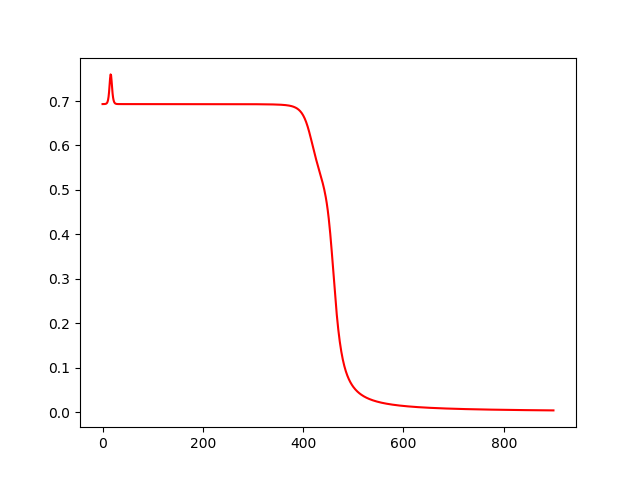


nn.predict(np.array([[1,1,1]]).T,params)


## Loss function derivative

\begin{align}
\mathscr{L}(\hat{y},y)=-ylog(\hat{y})-(1-y)log(1-\hat{y})
\end{align}

\begin{align}
\ \frac{d\mathscr{L}(\hat{y},y)}{d\hat{y}}\ = - \bigg( \bigl( \frac{y}{\hat{y}}\bigr) + (1-y)(-\frac{1}{1-\hat{y}} ) \bigg)
\end{align}

\begin{align}
\ \frac{d\mathscr{L}(\hat{y},y)}{d\hat{y}}\ = - \frac{y}{\hat{y}} + \frac{(1-y)}{(1-\hat{y})}
\end{align}

## Sigmoid derivative

\begin{align}
\ \sigma(z) = \frac{1}{1+e^{-z}} = (1 + e^{-z})^{-1} 
\end{align}

\begin{align}
\ \sigma(z)\prime = (1 + e^{-z})^{-1} = - \frac{(1+e^{-z})\prime} {(1+e^{-z})^{2}} =-(1+e^{-z})^{-2}(1+e^{-z})\prime
\end{align}


\begin{align}
\ \sigma(z)\prime =-(1+e^{-z})^{-2}(e^{-z} (-1)) = (1+e^{-z})^{-2} (e^{-z}) = \frac{e^{-z}}{(1+e^{-z})^{2}}
\end{align}

\begin{align}
\ \sigma(z)\prime = \frac{1}{(1+ e^{-z})}  \frac{e^{-z}}{(1+e^{-z})}
\end{align}

\begin{align}
\ \sigma(z)\prime = \frac{1}{(1+ e^{-z})}  \frac{(e^{-z}+1-1)}{(1+e^{-z})}
\end{align}

\begin{align}
\ \sigma(z)\prime = \frac{1}{(1+ e^{-z})}  \bigg(\frac{(1+e^{-z})}{(1+e^{-z})} - \frac{-1}{(1+e^{-z})} \bigg)
\end{align}

\begin{align}
\ \sigma(z)\prime = \frac{1}{(1+ e^{-z})}  \bigg( 1 - \frac{-1}{(1+e^{-z})} \bigg)
\end{align}

\begin{align}
\ \sigma(z)\prime = \sigma(z) \space \big( 1 - \sigma(z)\big)
\end{align}